In [3]:
#!/usr/bin/env python3
# coding: utf-8

import pandas as pd
import sys, os
from pathlib import Path
from pysradb.search import SraSearch

# genus = sys.argv[1]
genus = "Mycobacterium"
# if len(sys.argv) > 2:
#     num_results = sys.argv[2]
# else:
#     num_results = 2
    
# print(num_results)

path = Path("/scratch/jho5ze/bionets/operons/SRA/genera/")

query = SraSearch(return_max=4, query=f"{genus} RNA-Seq")
query.search()
query.get_df().tail(2).to_csv(path/f"{genus}/{genus}_query_info.csv")



100%|██████████| 4/4 [00:00<00:00, 12.99it/s]


In [7]:
query = SraSearch(return_max=4, query=f"SRX254760")
query.search()
query.get_df().to_csv(path/f"Escherichia/Escherichia_query_info.csv")

100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


In [11]:
data = pd.read_csv("/project/biocomplexity/COVID-19_commons/products/external_data_collection/vdh_biosurveillance/New format VDH-UVA-DSA-COVID-19-Variant.csv")

data.dropna().head(1)

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2,3,4,6,10,11,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,COVID_19_VARIANT,Report Date,VARIANT_CLEAN,Vaccine Age group,Age Group,Patient Age in Years,Tiered Race Ethnicity,Variant Count,Death Count,Hospitalized Count,...,PATIENT_CURRENT_SEX,PATIENT_COUNTY,OUTBREAK_NAME,Event_Dt_Upd,WEEK_END_DT_CDC,Lab_Report_Dt,Testing_Lab_Accession_Number,Reporting_Facility_Name,Ordering_Facility_Name,Test_result
4,B.1.1.7 - Alpha,2/10/2022,B.1.1.7,16-17 Years,10-19 Years,18.0,Black,1.0,0.0,0.0,...,Male,51003.0,RES003UVAfootbal0221,2/11/2021,2/13/2021,2/16/2021,21H-042MC00657,UVA Health System Medical Laboratories,UVA Athletics Sports Medicine,Positive Variant


In [17]:
data.dropna().iloc[0, 9:]

Hospitalized Count                                                 0.0
HealthDistrict                                              Blue Ridge
PATIENT_CURRENT_SEX                                               Male
PATIENT_COUNTY                                                 51003.0
OUTBREAK_NAME                                     RES003UVAfootbal0221
Event_Dt_Upd                                                 2/11/2021
WEEK_END_DT_CDC                                              2/13/2021
Lab_Report_Dt                                                2/16/2021
Testing_Lab_Accession_Number                            21H-042MC00657
Reporting_Facility_Name         UVA Health System Medical Laboratories
Ordering_Facility_Name                   UVA Athletics Sports Medicine
Test_result                                           Positive Variant
Name: 4, dtype: object

<AxesSubplot:>

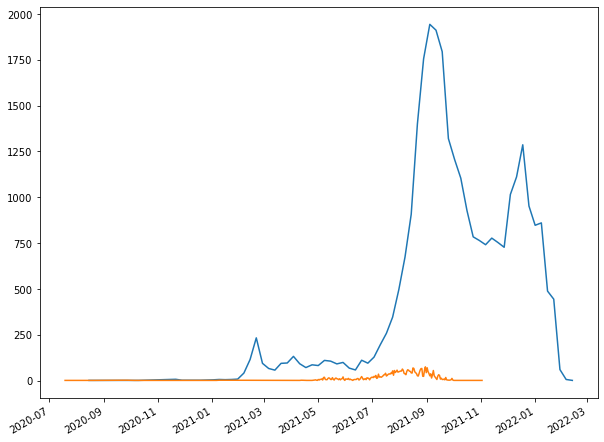

In [34]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(10,8))

data.WEEK_END_DT_CDC = pd.to_datetime(data.WEEK_END_DT_CDC)
data.WEEK_END_DT_CDC.value_counts().plot(ax=ax) #["Testing_Lab_Accession_Number"].dropna().head(30)
tsv = pd.read_csv("/sfs/qumulo/qproject/biocomplexity/COVID-19_commons/products/external_data_collection/VDH_opioids/VDH-UVA-DSA-COVID-19-Variant.tsv", sep="\t", parse_dates=["Event_Dt_Upd"])
tsv.Event_Dt_Upd.value_counts().plot(ax=ax)

In [29]:
tsv = pd.read_csv("/sfs/qumulo/qproject/biocomplexity/COVID-19_commons/products/external_data_collection/VDH_opioids/VDH-UVA-DSA-COVID-19-Variant.tsv", sep="\t")
tsv.head(2)

,COVID_19_VARIANT,Specimen_Id,Report Date,VARIANT_CLEAN,Vaccine Age group,Age Group,Patient Age in Years,Tiered Race Ethnicity,Variant Count,Death Count,...,PATIENT_CURRENT_SEX,PATIENT_COUNTY,OUTBREAK_IND,Event_Dt_Upd,WEEK_END_DT_CDC,Lab_Report_Dt,Testing_Lab_Accession_Number,Reporting_Facility_Name,Ordering_Facility_Name,DCLS Sequencing ID
0,B.1.1.7 - Alpha,R210410256,11/15/2021,B.1.1.7,65-74 Years,60-69 Years,69,Black,1,0,...,Female,51740,N,4/9/2021,4/10/2021,5/27/2021,R210410256-001,Virginia DCLS,PORTSMOUTH CITY HEALTH DEPARTMENT,VA-DCLS-5118
1,B.1.1.7 - Alpha,R210504305,11/15/2021,B.1.1.7,0-4 Years,0-9 Years,0,Other Race,1,0,...,Female,51087,N,4/26/2021,5/1/2021,5/27/2021,R210504305-001,Virginia DCLS,BON SECOURS ST MARY'S HOSPITAL,VA-DCLS-5119


In [35]:
data.shape

(39314, 21)

In [25]:
csv = pd.read_csv("/sfs/qumulo/qproject/biocomplexity/COVID-19_commons/products/external_data_collection/VDH_opioids/VDH-UVA-DSA-COVID-19-Variant.csv")
csv.head(2)


,report_date,covid_19_variant,variant_clean,vaccine_age_group,age_group,patient_age_in_years,tiered_race_ethnicity,variant_count,death_count,hospitalized_count,healthdistrict,patient_current_sex,patient_county,week_end_dt_cdc,specimen_id,testing_lab_accession_number,reporting_facility_name,ordering_facility_name
0,2021-10-27T00:00:00.000,B.1.1.7 - Alpha,B.1.1.7,0-4 Years,0-9 Years,4,Not Reported,1,0,0,Blue Ridge,Female,51003,2021-03-27T00:00:00.000,21H-082MC00324,21H-082MC00324,UVA Health System Medical Laboratories,Piedmont Pediatrics
1,2021-10-27T00:00:00.000,B.1.1.7 - Alpha,B.1.1.7,25-34 Years,20-29 Years,25,Latino,1,0,0,Blue Ridge,Female,51540,2021-03-27T00:00:00.000,21H-087MC00240,21H-087MC00240,UVA Health System Medical Laboratories,UVa Health
